## 군집 분석: K-Means Clustering

## (1) 붓꽃 데이터

In [1]:
from sklearn.datasets import load_iris 
from sklearn.cluster import KMeans 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### iris 데이터 로드

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

# 공백, 단위(cm) 등 불필요한 요소 포함

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# iris.data(array 형태)를 데이터프레임으로 변환

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # 컬럼명 list

df_iris = pd.DataFrame(iris.data, columns=feature_names) # df_iris에 데이터프레임 저장
df_iris

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [5]:
# target 컬럼 생성
df_iris['target'] = iris.target

# target 데이터 종류 확인
df_iris['target'].unique()

array([0, 1, 2])

### 데이터 시각화: Plotly 라이브러리
- 공식문서: https://plotly.com/python/
- color_continuous_scale: https://plotly.com/python/colorscales/

In [6]:
# df_iris 데이터 타입 확인
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int32
dtype: object

In [7]:
import plotly.express as px

In [8]:
##### sepal_width, sepal_length #####

# scatter plot 생성
fig = px.scatter(df_iris, x='sepal_width', y='sepal_length')

# 그래프 크기 조정
# update_layout(): plotly 타이틀 변경, 크기 조정 등
fig.update_layout(width=600, height=500)

fig.show()

In [9]:
# target 기준으로 색상 구분(default color scale 적용)
fig = px.scatter(df_iris, x='sepal_width', y='sepal_length', color='target')
fig.update_layout(width=600, height=500)
fig.show()

In [10]:
##### petal_width, petal_length #####

# scatter plot 생성
# 연속형 변수(target)에 continuous color scale 적용
fig = px.scatter(df_iris, x='petal_width', y='petal_length', color='target',
                 color_continuous_scale='rainbow')

fig.update_layout(width=600, height=500)
fig.show()

In [11]:
# 각 target(0, 1, 2)에 대한 discrete color 지정
fig = px.scatter(df_iris, x='petal_width', y='petal_length',
                 color=df_iris['target'].astype(str), # 연속형(수치형) -> 문자형 변환
                 color_discrete_sequence=['red', 'blue', 'green'])

fig.update_layout(width=600, height=500, legend_title='target')
fig.show()

### K-Means 알고리즘 적용

In [12]:
from sklearn.cluster import KMeans 

In [13]:
# 모델 객체 생성(군집 중심점 3개)
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=100, random_state=0)

# 모델 학습, 분류 수행
km = kmeans.fit_transform(iris.data)

In [14]:
kmeans.labels_ # 0, 1, 2가 무엇인지 모르는 상태로 분류만 수행

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [15]:
# kmeans로 구분된 타겟의 개수 확인(list 변환하여 for문 적용)
label_list = list(kmeans.labels_)

for x in set(label_list): # 중복되는 값 빼고 0, 1, 2 한 번씩만 개수 알려주도록 set()
    print(x,label_list.count(x))

# 실제 타겟 개수와 군집화 분류 타겟 개수에 약간의 차이 존재

0 62
1 50
2 38


### 실제 타겟과 군집화 분류 타겟의 비교

#### 개수 비교

In [16]:
df_iris_2 = df_iris.copy() # 복사본 생성

In [17]:
df_iris_2

sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]

In [18]:
df_iris_2['cluster'] = kmeans.labels_ # cluster: 분류 값
df_iris_2

sepal_length  sepal_width  petal_length  petal_width  target  cluster
0             5.1          3.5           1.4          0.2       0        1
1             4.9          3.0           1.4          0.2       0        1
2             4.7          3.2           1.3          0.2       0        1
3             4.6          3.1           1.5          0.2       0        1
4             5.0          3.6           1.4          0.2       0        1
..            ...          ...           ...          ...     ...      ...
145           6.7          3.0           5.2          2.3       2        2
146           6.3          2.5           5.0          1.9       2        0
147           6.5          3.0           5.2          2.0       2        2
148           6.2          3.4           5.4          2.3       2        2
149           5.9          3.0           5.1          1.8       2        0

[150 rows x 6 columns]

In [19]:
# groupby target + cluster -> 개수 확인
iris_result = df_iris_2.groupby(['target', 'cluster'])[['sepal_length']].count()
iris_result

sepal_length
target cluster              
0      1                  50
1      0                  48
       2                   2
2      0                  14
       2                  36

#### 시각화

** sepal length, sepal width 두 개의 컬럼으로 시각화 **
- https://matplotlib.org/stable/tutorials/colors/colormaps.html?highlight=colormaps

Text(0.5, 1.0, 'k-means')

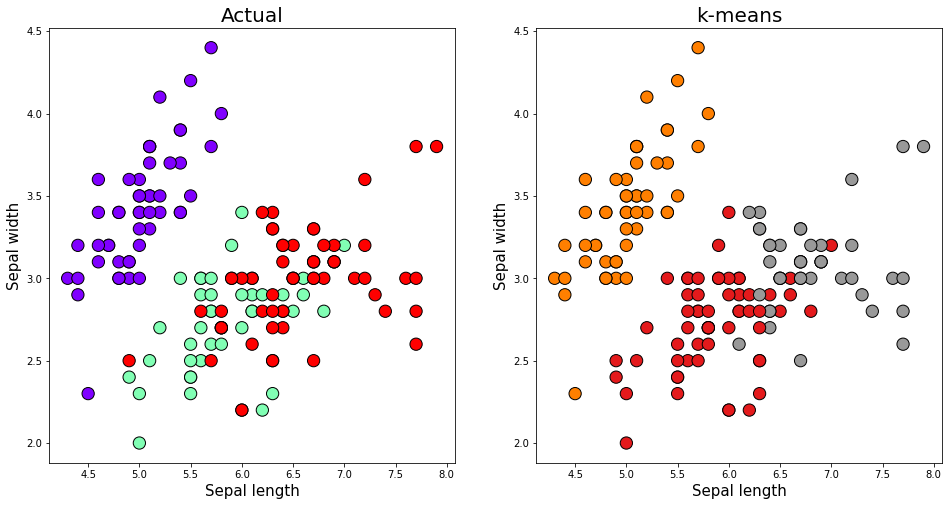

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 인덱스로 두 개 이상의 그래프에 접근
# data=df_iris_2, 'sepal_length', 'sepal_width'

# target
axes[0].scatter(df_iris_2['sepal_length'], df_iris_2['sepal_width'],  
                c=df_iris_2['target'], # target 기준으로 색을 구분
                cmap='rainbow', s=150, edgecolor='k')

# cluster
axes[1].scatter(df_iris_2['sepal_length'], df_iris_2['sepal_width'],  
                c=df_iris_2['cluster'], # cluster 기준으로 색을 구분
                cmap='Set1', s=150, edgecolor='k')

axes[0].set_xlabel('Sepal length', fontsize=15)
axes[0].set_ylabel('Sepal width', fontsize=15)
axes[1].set_xlabel('Sepal length', fontsize=15)
axes[1].set_ylabel('Sepal width', fontsize=15)

axes[0].set_title('Actual', fontsize=20)
axes[1].set_title('k-means', fontsize=20)

In [21]:
import plotly.express as px

# plotly도 make subplots로 여러 개의 그래프 그릴 수 있음
# 궁금하면 구글링 해보기

fig = px.scatter(df_iris_2, x='petal_width', y='petal_length', color=df_iris_2['target'].astype(str),
                 color_discrete_sequence=['red', 'blue', 'green'])
fig.update_layout(width=600, height=500, legend_title='Target', title='Actual')
fig.show()
fig2 = px.scatter(df_iris_2, x='petal_width', y='petal_length', color=df_iris_2['cluster'].astype(str),
                 color_discrete_sequence=['red', 'blue', 'green'])
fig2.update_layout(width=600, height=500, legend_title='cluster', title='K-Means')

fig2.show()

In [22]:
# 군집 중심점의 좌표(shape=[군집 개수, feature 개수])
centers = kmeans.cluster_centers_
centers

# 세 개의 군집, 네 개의 feature

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### PCA(Principal Component Analysis) 차원 축소

In [23]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler()
iris_scaled = iris_scaled.fit_transform(iris.data)

In [24]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
pca_transformed = pca.fit_transform(iris_scaled)

In [25]:
pca_transformed[:30]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [26]:
# pca_transformed 각 컬럼의 값(x, y 좌표)을 저장
df_iris_2['pca_x'] = pca_transformed[:, 0]
df_iris_2['pca_y'] = pca_transformed[:, 1]
df_iris_2.head(3)

sepal_length  sepal_width  petal_length  petal_width  target  cluster  \
0           5.1          3.5           1.4          0.2       0        1   
1           4.9          3.0           1.4          0.2       0        1   
2           4.7          3.2           1.3          0.2       0        1   

      pca_x     pca_y  
0 -2.264703  0.480027  
1 -2.080961 -0.674134  
2 -2.364229 -0.341908

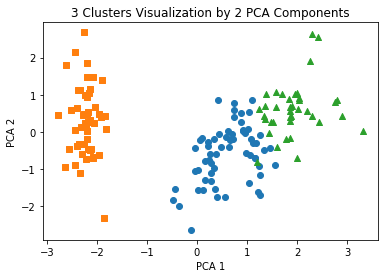

In [27]:
# clustering 시각화
import matplotlib.pyplot as plt

# 분류 타겟(0, 1, 2)별로 인덱스 추출
marker0_ind = df_iris_2[df_iris_2['cluster'] == 0].index 
marker1_ind = df_iris_2[df_iris_2['cluster'] == 1].index 
marker2_ind = df_iris_2[df_iris_2['cluster'] == 2].index 

# 분류 타겟별 marker를 다르게 적용하여 시각화
plt.scatter(x=df_iris_2.loc[marker0_ind,'pca_x'],
            y=df_iris_2.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=df_iris_2.loc[marker1_ind,'pca_x'],
            y=df_iris_2.loc[marker1_ind,'pca_y'], marker='s') 
plt.scatter(x=df_iris_2.loc[marker2_ind,'pca_x'],
            y=df_iris_2.loc[marker2_ind,'pca_y'], marker='^') 

plt.xlabel('PCA 1') 
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components') 

plt.show() 

# 차원 축소 후에도 앞선 그래프와 유사한 형태 도출
# 실루엣 스코어를 통해 실제 분류를 평가

### 실루엣 스코어
- 군집화 평가

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score 

# iris의 모든 개별 데이터에 대한 실루엣 계수
score_samples = silhouette_samples(iris.data, df_iris_2['cluster'])
score_samples

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

In [29]:
# silhouette_coeff 컬럼 생성
df_iris_2['silhouette_coeff'] = score_samples

In [30]:
df_iris_2

sepal_length  sepal_width  petal_length  petal_width  target  cluster  \
0             5.1          3.5           1.4          0.2       0        1   
1             4.9          3.0           1.4          0.2       0        1   
2             4.7          3.2           1.3          0.2       0        1   
3             4.6          3.1           1.5          0.2       0        1   
4             5.0          3.6           1.4          0.2       0        1   
..            ...          ...           ...          ...     ...      ...   
145           6.7          3.0           5.2          2.3       2        2   
146           6.3          2.5           5.0          1.9       2        0   
147           6.5          3.0           5.2          2.0       2        2   
148           6.2          3.4           5.4          2.3       2        2   
149           5.9          3.0           5.1          1.8       2        0   

        pca_x     pca_y  silhouette_coeff  
0   -2.264703  0.480027          0.852955  
1   -2.080961 -0.674134          0.815495  
2   -2.364229 -0.341908          0.829315  
3   -2.299384 -0.597395          0.805014  
4   -2.389842  0.646835          0.849302  
..        ...       ...               ...  
145  1.870503  0.386966          0.425136  
146  1.564580 -0.896687          0.104171  
147  1.521170  0.269069          0.314930  
148  1.372788  1.011254          0.352454  
149  0.960656 -0.024332          0.185442  

[150 rows x 9 columns]

In [31]:
# 모든 데이터의 평균 실루엣 계수값 도출
average_score = silhouette_score(iris.data, df_iris_2['cluster'])
print(f'붓꽃 데이터셋 Silhouette Analysis Score: {average_score:.3f}')

# 개별로 봤을 때 1에 가까우면 실루엣 계수가 좋다고 평가
# 평균으로 봤을 때 0.5 정도면 잘 나온 것이라고 평가

붓꽃 데이터셋 Silhouette Analysis Score: 0.553


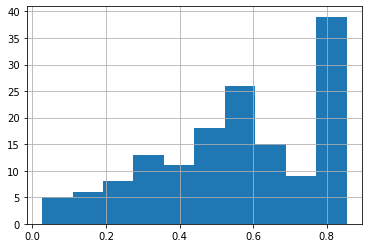

In [32]:
plt.hist(df_iris_2['silhouette_coeff'])
plt.grid()

# 데이터의 실루엣 계수가 0.8 부분에 주로 분포

In [33]:
# groupby cluster -> 군집별 실루엣 계수의 평균
df_iris_2.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 최적의 K 찾기
- K-means clustering의 단점은 군집의 개수가 정해져 있지 않다는 것

#### Elbow method

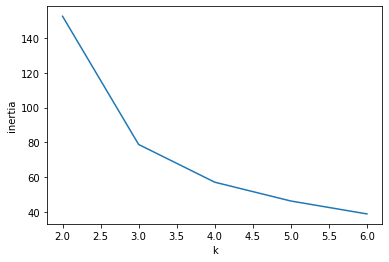

In [34]:
# 군집에 포함된 데이터가 퍼져있는 정도(inertia)를 활용
# inertia_가 클수록 군집점과 데이터 간의 거리가 멀다는 의미

inertia = []
for k in range(2,7): # 군집접 2~6개(기본 2개 이상만 가능)
    km = KMeans(n_clusters=k, random_state=42)
    km.fit_transform(iris.data)
    inertia.append(km.inertia_)
    
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# 그래프가 급격히 완만해지는 지점 이후의 K = 3, 4가 적당

In [35]:
# lineplot(x축: K, y축: inertia)
import plotly.express as px

k_range = range(2,7)
fig = px.line(x= k_range, y=inertia, labels={'x':'k', 'y':'inertia'})
fig.update_layout(width=700, height=500)
fig.show()

#### KElbowVisualizer
- visualizer 훈련과 시각화를 동시에 진행
- 대용량 데이터의 경우 fit time도 중요한 고려요소

In [36]:
# !pip install yellowbrick

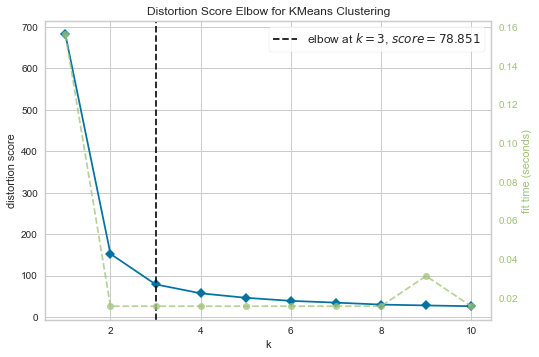

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(1, 11)) # 하나의 군집도 가능
visualizer.fit(iris.data)
visualizer.poof()

#### Silhouette method

In [39]:
# 실루엣 계수를 활용
# silhouette_score 모듈 -> array 형태(iris.data)만 수용 가능(데이터프레임 x)
from sklearn.metrics import silhouette_score

sc = [] 
k_range = range(2, 11) # 2~10개의 군집(실루엣의 경우 2개 이상만 가능)
for i in k_range:
  km = KMeans(n_clusters=i)
  km.fit_transform(iris.data)
  sc_value = silhouette_score(iris.data, km.labels_)
  sc.append(sc_value)
  print(f'Silhouette score(n={i}): {sc_value}')

# n=2의 경우에 실루엣 계수 최대
# 그래프로 시각화하여 자세히 확인

Silhouette score(n=2): 0.6810461692117462
Silhouette score(n=3): 0.5528190123564095
Silhouette score(n=4): 0.49805050499728737
Silhouette score(n=5): 0.4887488870931056
Silhouette score(n=6): 0.3599431166074401
Silhouette score(n=7): 0.35200746716162923
Silhouette score(n=8): 0.3500602959686737
Silhouette score(n=9): 0.327544104615269
Silhouette score(n=10): 0.3101215115958724


In [40]:
# lineplot(x축: K, y축: silhouette scores)
fig = px.line(x=k_range, y=sc, labels={'x':'k', 'y':'Silhouette scores'})
fig.update_layout(width=800, height=500)
fig.show()

# 3개? 4개? 6개?
# 해석이 확실하지 않으므로 silhouette visualizer 적용

#### SilhouetteVisualizer
- 그래프를 통해 각 군집의 분포를 종합적으로 평가

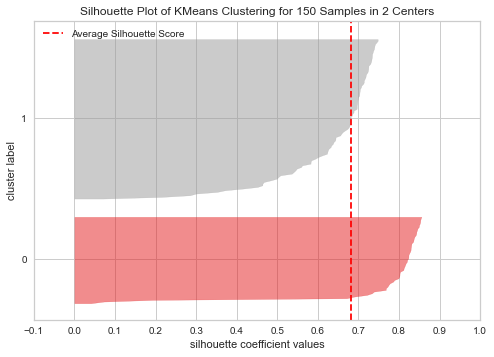

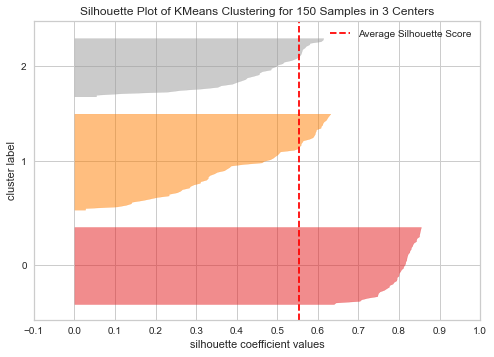

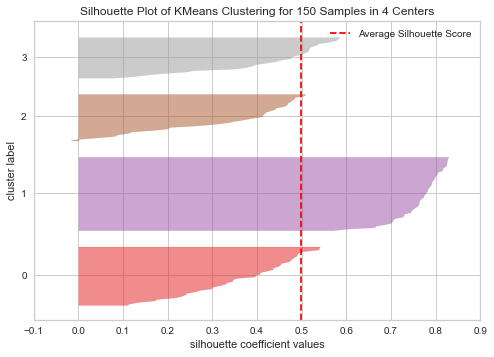

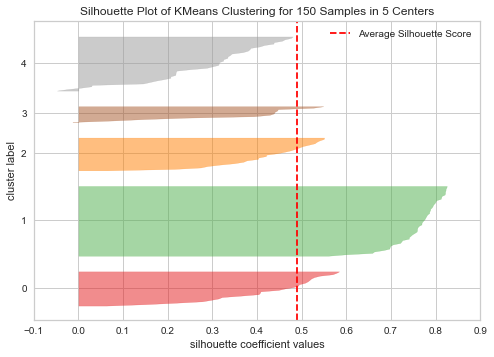

In [41]:
# SilhouetteVisualizer 사용하여 훈련과 시각화를 동시에 진행
from yellowbrick.cluster import SilhouetteVisualizer

# k의 범위 지정(최소 2개 이상의 label/cluster 필요)
k_range = range(2, 6)
for i in k_range:
    km = KMeans(n_clusters=i, init='k-means++')
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(iris.data)
    visualizer.poof()

# k=2일 때 실루엣 계수 최대
# but, 데이터 간의 거리가 너무 멀어 2개와 3개 중에 고민

## (2) 과일 사진 데이터

In [42]:
import numpy as np

In [43]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) # 2차원 변환

In [44]:
from sklearn.cluster import KMeans

# k-means 객체 생성(군집이 3개인 것을 안다고 가정)
km = KMeans(n_clusters=3, random_state=41)

# 모델 학습 및 변환
km_centers = km.fit_transform(fruits_2d) # 2차원 데이터 필요

In [45]:
# 군집화 결과 출력(0, 1, 2)
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [46]:
# return_counts=True -> unique한 범주에 속한 데이터의 개수도 출력
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


In [47]:
# 3차원 array(샘플 개수, 너비, 높이)를 입력받아 한 줄에 10개씩 이미지 출력

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    
    n = len(arr) # n: 샘플 개수
    
    rows = int(np.ceil(n/10)) # 한 줄에 10개의 이미지를 출력하므로 n/10으로 전체 행 개수 계산
    cols = n if rows < 2 else 10 # 열의 개수는 행이 1개인 경우 n, 나머지는 10
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio),
                             squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j < n: # n개의 이미지만 출력
                axes[i,j].imshow(arr[i*10+j], cmap='gray_r') # imshow(): 이미지 출력
            axes[i,j].axis('off') # axis 출력 x
    plt.show()

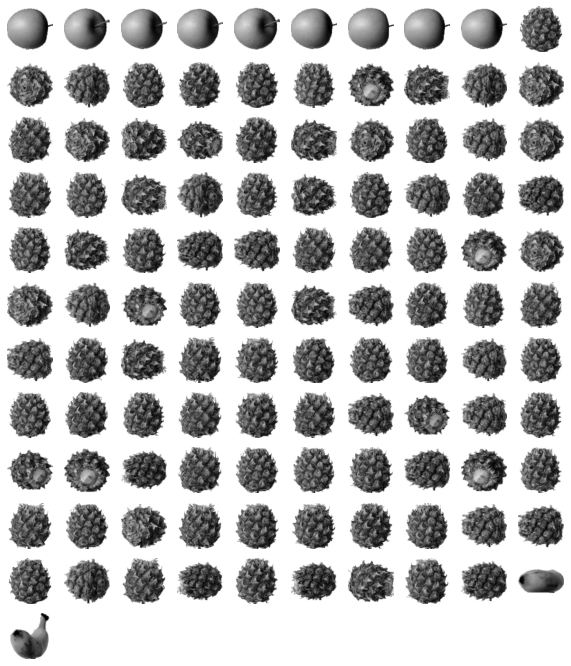

In [48]:
# labels_ 값이 0인 이미지 출력
draw_fruits(fruits[km.labels_ == 0])

# 대부분 파인애플이지만 중간중간 다른 과일도 존재

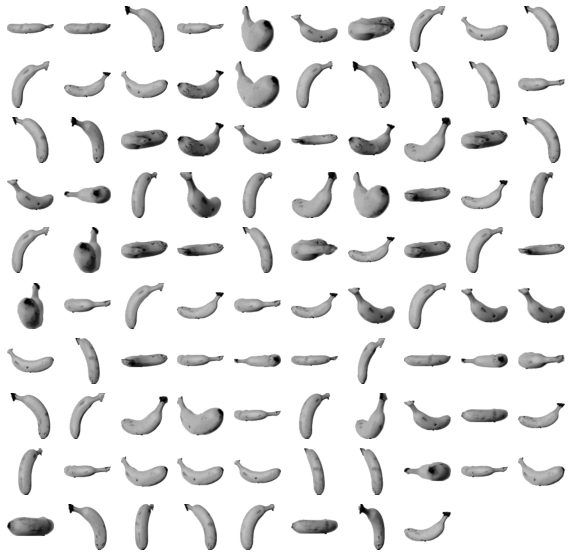

In [49]:
# labels_ 값이 1인 이미지 출력
draw_fruits(fruits[km.labels_ == 1])

# 바나나

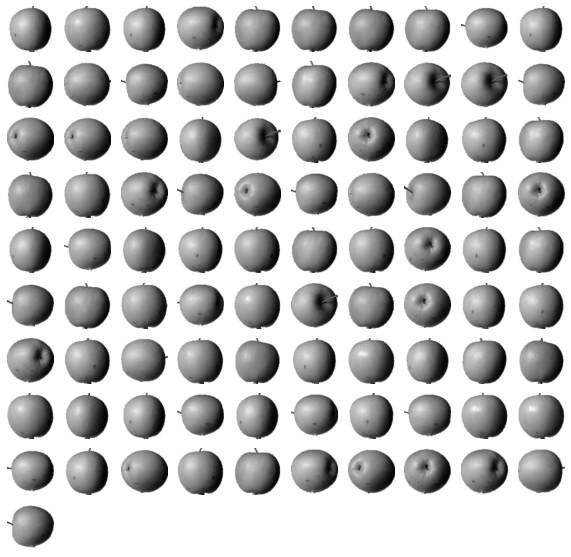

In [50]:
# labels_ 값이 2인 이미지 출력
draw_fruits(fruits[km.labels_ == 2])

# 사과

### 군집 중심

In [51]:
type(km_centers)

numpy.ndarray

In [52]:
# 실제 군집 중심
km_centers[0:3]

# 첫 번째 열부터 0, 1, 2인데 이 중 가장 거리가 작은 값으로 분류
# -> 첫 3개의 행은 모두 2로 분류

array([[4677.10527943, 8642.61845541, 3087.33092099],
       [5363.9344124 , 9030.55531495, 2641.34592861],
       [4637.76848934, 8494.99543011, 3122.48819955]])

In [53]:
# 예측 군집 중심
# 가장 가까운 군집 중심을 예측 클래스로 출력
print(km.predict(fruits_2d[0:3]))

# 처음 3개의 개체 모두 2로 예측 -> 실제 군집 중심과 동일

[2 2 2]


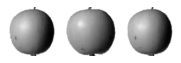

In [54]:
# 처음 3개의 이미지 출력
draw_fruits(fruits[0:3])

# 2번 타겟이 사과로 분류된 것을 확인 가능
# 그림으로 직접 확인하기 전에는 0, 1, 2가 각각 어떤 과일인지 알 수 없음

In [55]:
# n_iter_: 군집 중심점을 이동한 횟수
# k-means clustering -> 반복적으로 군집 중심을 옮기면서 최적의 cluster를 찾는 알고리즘
print(km.n_iter_)

6


### 최적의 K 찾기

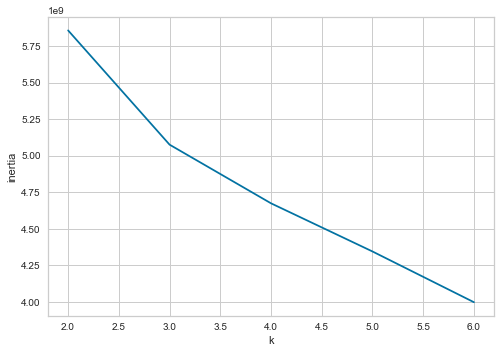

In [56]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit_transform(fruits_2d)
    inertia.append(km.inertia_)
    
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# 급격히 완만해지면서 꺾이는 지점이 적절한 군집의 개수
# 해석이 어려운 그래프 -> 꺾이는 지점이 있지만 잘 드러나지 x

In [57]:
from sklearn.metrics import silhouette_score

sc = [] 
k_range = range(2,11)
for i in k_range:
  km = KMeans(n_clusters = i)
  km.fit_transform(fruits_2d)
  sc_value = silhouette_score(fruits_2d, km.labels_)
  sc.append(sc_value)
  print(f'Silhouette score(n={i}): {sc_value}')

Silhouette score(n=2): 0.3930944694387175
Silhouette score(n=3): 0.2424386970519635
Silhouette score(n=4): 0.20062387805878962
Silhouette score(n=5): 0.2228680714095026
Silhouette score(n=6): 0.22427115322675506
Silhouette score(n=7): 0.23954829939607925
Silhouette score(n=8): 0.23562450039992125
Silhouette score(n=9): 0.2550830148769816
Silhouette score(n=10): 0.2539667427940832


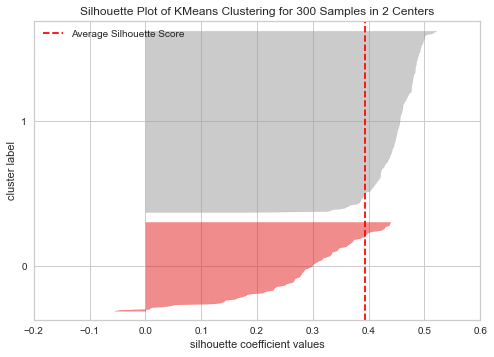

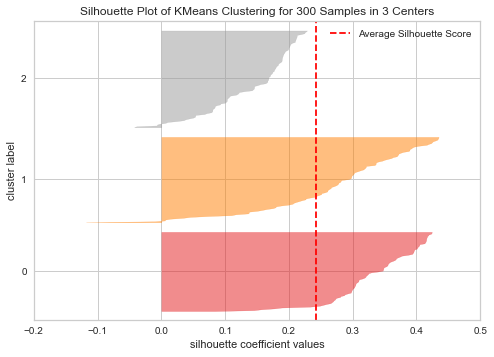

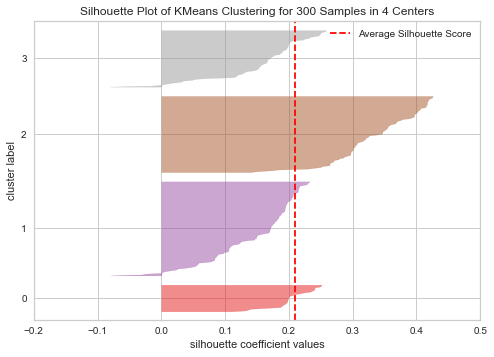

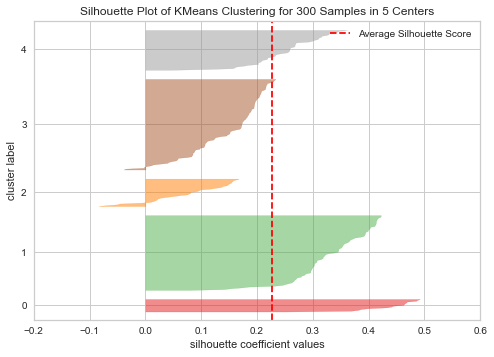

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer

k_range = range(2, 6) # k의 범위 지정(최소 2개 이상)
for i in k_range:
    km = KMeans(n_clusters=i, init="k-means++")
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(fruits_2d)
    visualizer.poof()